In [13]:
from keras import models
from keras import layers
from keras import optimizers
import numpy as np
import os
import matplotlib.pyplot as plt

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Data prepare

Use image data generator read the image

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = r"kaggle_dataset\cats_and_dogs_small\train"
validation_dir = r"kaggle_dataset\cats_and_dogs_small\validation"
test_dir = r"kaggle_dataset\cats_and_dogs_small\test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), 
                                                      batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


train the model

In [17]:
history = model.fit(train_generator, steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 26s 252ms/step - loss: 0.6906 - acc: 0.5210 - val_loss: 0.6904 - val_acc: 0.5190
Epoch 2/30
100/100 [==============================] - 27s 269ms/step - loss: 0.6723 - acc: 0.5810 - val_loss: 0.6792 - val_acc: 0.5340
Epoch 3/30
100/100 [==============================] - 29s 294ms/step - loss: 0.6485 - acc: 0.6135 - val_loss: 0.6323 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 36s 360ms/step - loss: 0.6172 - acc: 0.6595 - val_loss: 0.6538 - val_acc: 0.6010
Epoch 5/30
100/100 [==============================] - 49s 496ms/step - loss: 0.5765 - acc: 0.6945 - val_loss: 0.6127 - val_acc: 0.6700
Epoch 6/30
100/100 [==============================] - 43s 431ms/step - loss: 0.5539 - acc: 0.7060 - val_loss: 0.5974 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 44s 440ms/step - loss: 0.5365 - acc: 0.7315 - val_loss: 0.6136 - val_acc: 0.6530
Epoch 8/30
100/100 [==============================] - 4

Save the model

In [18]:
model.save('cats_and_dogs_small_1.keras')

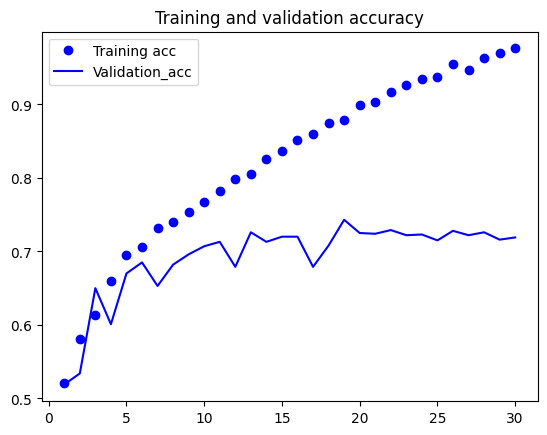

In [19]:


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()